In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import pandas as pd
from matplotlib import cm
from IPython.display import display, HTML
import operator as op

In [2]:
data_dir = '../data/'


In [12]:
df_nips = pd.read_csv(data_dir + 'nips_2016-2020.csv')
df_icml = pd.read_csv(data_dir + 'icml_affiliations.csv')

df_iclr1 = pd.read_csv(data_dir + 'ICLR-2017-18-19-21.csv')
df_iclr2 = pd.read_csv(data_dir + '2020_iclr_manual_data.csv')
df_iclr = pd.concat([df_iclr1, df_iclr2], sort=True)
df_iclr = df_iclr.reset_index(drop=True)
df_cvpr = pd.read_csv(data_dir + 'cvpr_16-21.csv')

df_cvpr_citations = pd.read_csv(data_dir + 'cvpr_citations.csv')

In [4]:
df_cvpr['Authors']
for i in range(len(df_cvpr['Authors'])): 
    df_cvpr['Authors'][i] = df_cvpr['Authors'][i].replace(';',',')
    
for i in range(len(df_iclr['Citations'])):
    try:
        df_iclr['Citations'][i] = int(df_iclr['Citations'][i])
        df_iclr['YEAR'][i] = int(df_iclr['YEAR'][i])
    except Exception as e: 
        df_iclr['Citations'][i] = 0
        df_iclr['YEAR'][i] = df_iclr['YEAR'][i-1]

/tmp/ipykernel_72280/1717524439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cvpr['Authors'][i] = df_cvpr['Authors'][i].replace(';',',')
/tmp/ipykernel_72280/1717524439.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iclr['Citations'][i] = int(df_iclr['Citations'][i])
/tmp/ipykernel_72280/1717524439.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iclr['YEAR'][i] = int(df_iclr['YEAR'][i])
/tmp/ipykernel_72280/171

In [5]:
years = df_nips['YEAR'].unique()
years

array([2016, 2017, 2018, 2019, 2020, 2021])

In [6]:
paper_per_year = {'NIPS': dict(),'ICML':dict(),'ICLR':dict(),'CVPR': dict()}
data = [df_nips, df_icml, df_iclr, df_cvpr]
num = 0
for key in paper_per_year.keys():
    print(key)
    pub_per_year = dict()

    for i in years: 
        pub_per_year.update({i:0})

    for i in range(len(data[num])): 
        pub_per_year[data[num]['YEAR'][i]] +=1
    paper_per_year[key] = pub_per_year
    num+=1

NIPS
ICML
ICLR
CVPR


In [7]:
paper_per_year['ICML']

{2016: 0, 2017: 434, 2018: 621, 2019: 773, 2020: 1084, 2021: 1181}

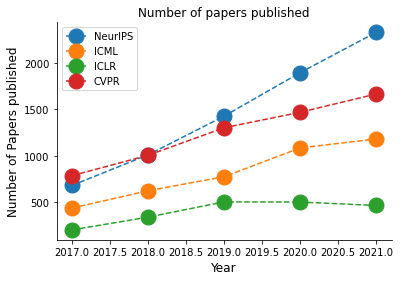

In [8]:
fig,axs = subplots(1,1) 
axs.plot(years[1:], list(paper_per_year['NIPS'].values())[1:],marker = 'o', linestyle='--', markersize = 15, label = 'NeurIPS')
axs.plot(years[1:], list(paper_per_year['ICML'].values())[1:],marker = 'o', linestyle='--', markersize = 15, label = 'ICML')
axs.plot(years[1:], list(paper_per_year['ICLR'].values())[1:],marker = 'o', linestyle='--', markersize = 15, label = 'ICLR')
axs.plot(years[1:], list(paper_per_year['CVPR'].values())[1:],marker = 'o', linestyle='--', markersize = 15, label = 'CVPR')
axs.set_xlabel('Year', fontsize = 12)
axs.set_ylabel('Number of Papers published',fontsize = 12)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_title('Number of papers published')
axs.legend()

In [9]:
df_nips_citations = pd.read_csv(data_dir + 'nips_citations.csv')
df_icml_citations = pd.read_csv(data_dir + 'icml_citations.csv')
df_iclr_citations = pd.DataFrame({'YEAR':df_iclr['YEAR'], 'citations':df_iclr['Citations']})
df_iclr_citations['citations'].astype('int64').dtypes
type(df_iclr_citations['citations'][1994])

int

In [10]:
nips_2017 = df_nips_citations[df_nips_citations['YEAR']==2017].sort_values(by='citations', ascending = False)
nips_2018 = df_nips_citations[df_nips_citations['YEAR']==2018].sort_values(by='citations', ascending = False)
nips_2019 = df_nips_citations[df_nips_citations['YEAR']==2019].sort_values(by='citations', ascending = False)
print('Neurips {}'.format(2017))
display(HTML(nips_2017[['TITLE', 'citations']].head(n=10).to_html(index=False)))
# print('Neurips {}'.format(2018))
# display(HTML(nips_2018[['TITLE', 'citations']].head(n=10).to_html(index=False)))
# print('Neurips {}'.format(2019))
# display(HTML(nips_2019[['TITLE', 'citations']].head(n=10).to_html(index=False)))

Neurips 2017


TITLE,citations
Attention is All you Need,31339
Improved Training of Wasserstein GANs,5834
GANs Trained by a Two Time-Scale Update Rule Converge to a Local Nash Equilibrium,3971
Simple and Scalable Predictive Uncertainty Estimation using Deep Ensembles,2058
Unsupervised Image-to-Image Translation Networks,1882
Self-Normalizing Neural Networks,1733
Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments,1663
Hindsight Experience Replay,1258
A simple neural network module for relational reasoning,1201
Deep Sets,1189


In [13]:
bins = [0,50,500,5000,50000,500000]

nips_citations_2017 = df_nips_citations[df_nips_citations['YEAR']==2017]['citations']
nips_citations_2018 = df_nips_citations[df_nips_citations['YEAR']==2018]['citations']
nips_citations_2019 = df_nips_citations[df_nips_citations['YEAR']==2019]['citations']
nips_citations_2020 = df_nips_citations[df_nips_citations['YEAR']==2020]['citations']

icml_citations_2017 = df_icml_citations[df_icml_citations['YEAR']==2017]['citations']
icml_citations_2018 = df_icml_citations[df_icml_citations['YEAR']==2018]['citations']
icml_citations_2019 = df_icml_citations[df_icml_citations['YEAR']==2019]['citations']
icml_citations_2020 = df_icml_citations[df_icml_citations['YEAR']==2020]['citations']

iclr_citations_2017 = df_iclr_citations[df_iclr_citations['YEAR']==2017]['citations']
iclr_citations_2018 = df_iclr_citations[df_iclr_citations['YEAR']==2018]['citations']
iclr_citations_2019 = df_iclr_citations[df_iclr_citations['YEAR']==2019]['citations']
iclr_citations_2020 = df_iclr_citations[df_iclr_citations['YEAR']==2020]['citations']

cvpr_citations_2017 = df_cvpr_citations[df_cvpr_citations['YEAR']==2017]['citations']
cvpr_citations_2018 = df_cvpr_citations[df_cvpr_citations['YEAR']==2018]['citations']
cvpr_citations_2019 = df_cvpr_citations[df_cvpr_citations['YEAR']==2019]['citations']
cvpr_citations_2020 = df_cvpr_citations[df_cvpr_citations['YEAR']==2020]['citations']




nips_citations = {2017:np.histogram(nips_citations_2017, bins), 2018:np.histogram(nips_citations_2018,bins),\
                  2019:np.histogram(nips_citations_2019,bins), 2020:np.histogram(nips_citations_2020,bins)}

icml_citations = {2017:np.histogram(icml_citations_2017,bins), 2018:np.histogram(icml_citations_2018,bins),\
                  2019:np.histogram(icml_citations_2019,bins), 2020:np.histogram(icml_citations_2020,bins)}

iclr_citations = {2017:np.histogram(iclr_citations_2017, bins), 2018:np.histogram(iclr_citations_2018, bins),\
                  2019:np.histogram(iclr_citations_2019, bins), 2020: np.histogram(iclr_citations_2020, bins)}

cvpr_citations = {2017:np.histogram(cvpr_citations_2017, bins),2018:np.histogram(cvpr_citations_2018, bins),\
                 2019:np.histogram(cvpr_citations_2019, bins),2020:np.histogram(cvpr_citations_2020, bins)}


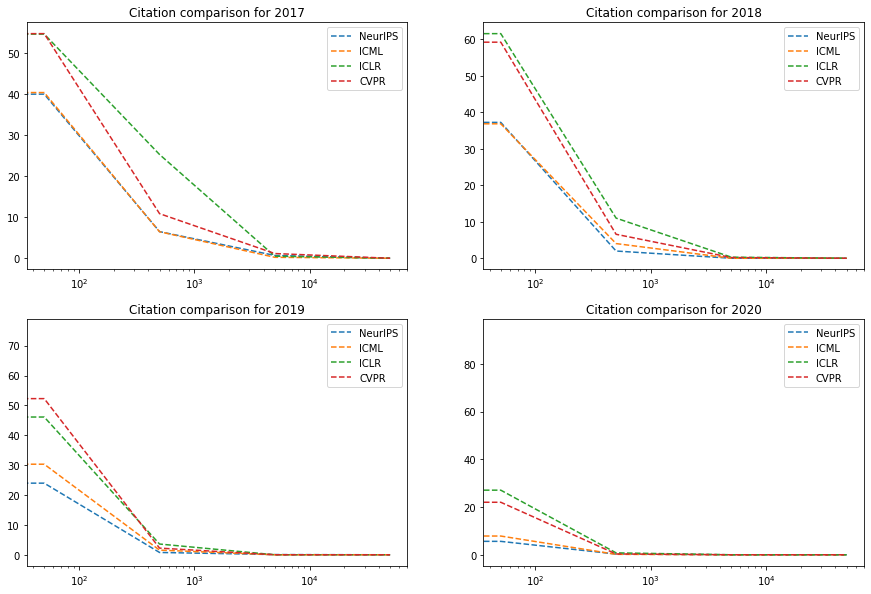

In [17]:
years = list(nips_citations.keys())
fig,axs = subplots(2,2,figsize = (15,10))
for i in range(len(years)):
    axs[i//2, i%2].plot(list(nips_citations[years[i]][1][:-1]), list(100*nips_citations[years[i]][0])/sum(list(nips_citations[years[i]][0])),label='NeurIPS', linestyle = '--')
    axs[i//2,i%2].plot(list(icml_citations[years[i]][1][:-1]), list(100*icml_citations[years[i]][0])/sum(list(icml_citations[years[i]][0])),label='ICML', linestyle = '--')
    axs[i//2,i%2].plot(list(iclr_citations[years[i]][1][:-1]), list(100*iclr_citations[years[i]][0])/sum(list(iclr_citations[years[i]][0])), label='ICLR',linestyle = '--')
    axs[i//2,i%2].plot(list(cvpr_citations[years[i]][1][:-1]), list(100*cvpr_citations[years[i]][0])/sum(list(cvpr_citations[years[i]][0])), label='CVPR',linestyle = '--')
    axs[i//2,i%2].set_title(f'Citation comparison for {years[i]}')
    axs[i//2,i%2].set_xscale('log')
    axs[i//2,i%2].legend()

In [18]:
# df_whole = pd.concat([df_nips, df_iclr, df_icml, df_cvpr])
df_whole = pd.concat([df_nips, df_icml,df_iclr])

In [19]:
affiliations = np.asarray(df_whole['Affiliations'])
aff_dict = dict()

for i in range(len(affiliations)):
    
    aff = str(affiliations[i]).replace('[','').replace(']','').replace('The','').split(', ')
    for entry in aff:
        entry = entry.replace("'",'')
        if entry not in aff_dict.keys():
            aff_dict.update({entry:1})
        else:
            aff_dict[entry] +=1
   
            
affil = dict(sorted(aff_dict.items(), key = op.itemgetter(1))[::-1])

def remove_duplicates(target_key, words):
    assert target_key in list(affil.keys())
    assert isinstance(words, list) and len(words) >= 1
    for key in list(affil.keys()): 
        if any(word in key.lower() for word in words)  : 
            affil[target_key] += affil[key]
            affil[key] = 0

remove_duplicates('Google', ['google','deepmind'])
words = ['uc san diego', 'university of california san diego',\
            'university of california at san diego','university of california, san diego','university of california']
remove_duplicates('UCSD',words)
remove_duplicates('MIT', ['massachusetts'])
remove_duplicates('Stanford', ['stanford uni'])
remove_duplicates('UCLA',['los angeles', 'university of california los angeles',\
                          'university of california, los angeles', 'university of california at los angeles'])
affil['UCSD']
affil['MIT']
affil['Stanford']


1719

In [20]:
affil = dict((sorted(affil.items(), key = op.itemgetter(1))[::-1])[:30])
affil.pop('None')

504

Text(0.5, 1.0, 'Institutes most active in publications')

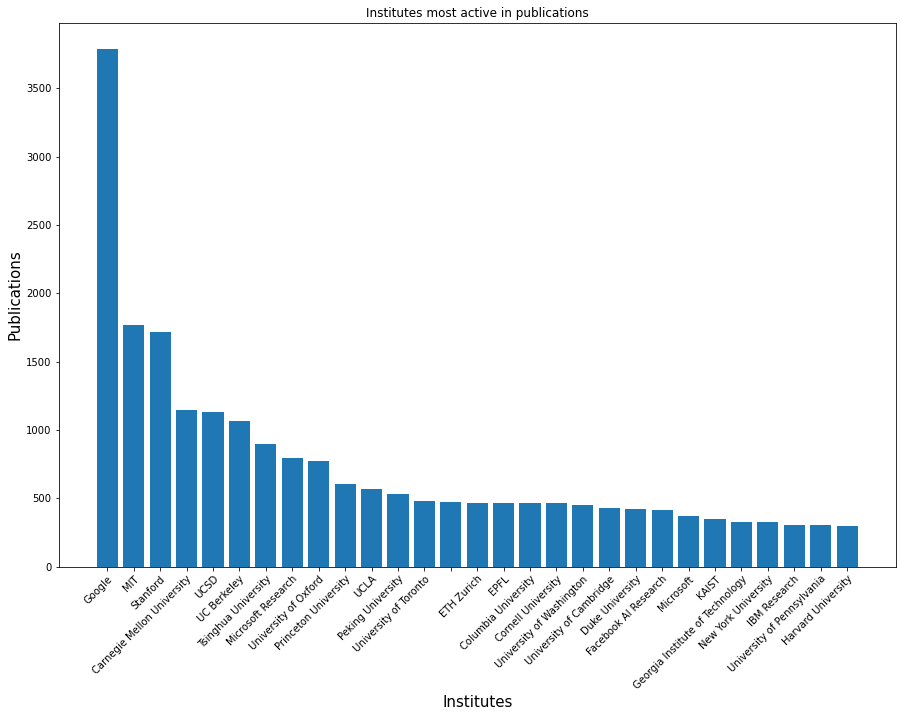

In [21]:
fig,ax = subplots(figsize=(15,10))
ax.bar(affil.keys(), affil.values())
ax.set_xlabel('Institutes', fontsize = 15)
ax.set_ylabel('Publications', fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.title('Institutes most active in publications')

In [22]:
authors = np.asarray(df_whole['Authors'])

In [23]:
author_dict = dict()
for row in authors: 
    row = str(row).split(', ')
    for entry in row: 
        if entry not in author_dict.keys():
            author_dict.update({entry:1})
        else: 
            author_dict[entry]+=1

In [24]:
author_dict = sorted(author_dict.items(), key = op.itemgetter(1))[::-1]

In [25]:
author_dict = dict(author_dict[:30])

Text(0.5, 1.0, 'Authors most active in publications')

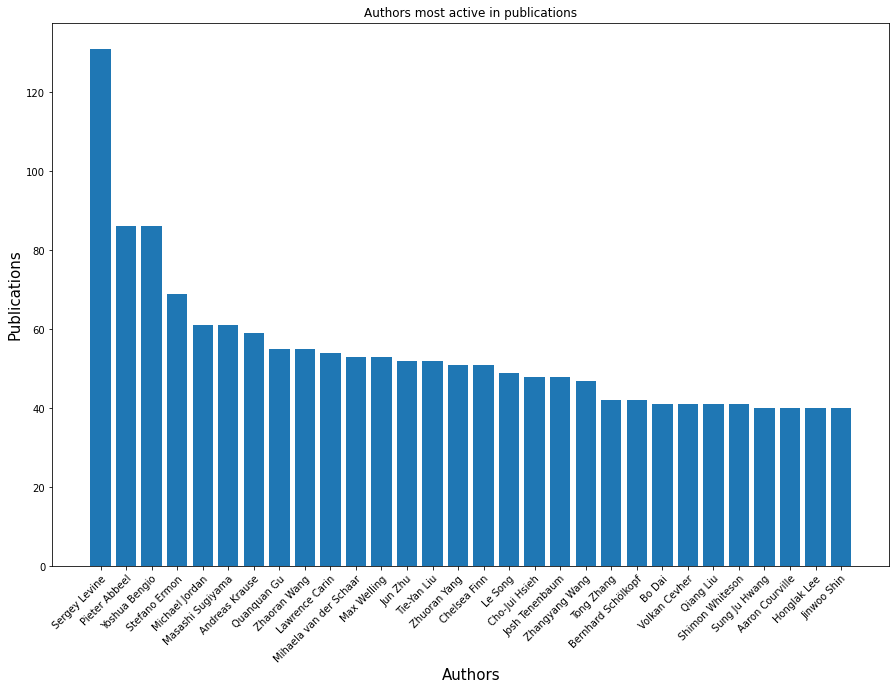

In [26]:
fig,ax = subplots(figsize = (15,10))
ax.bar(author_dict.keys(), author_dict.values())
ax.set_xlabel('Authors', fontsize = 15)
ax.set_ylabel('Publications', fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.title('Authors most active in publications')

#Try horizontal bar chart

In [27]:
affil_nips_2017 = np.asarray(df_nips[df_nips['YEAR']==2017]['Affiliations'])
affil_nips_2018 = np.asarray(df_nips[df_nips['YEAR']==2018]['Affiliations'])
affil_nips_2019 = np.asarray(df_nips[df_nips['YEAR']==2019]['Affiliations'])
affil_nips_2020 = np.asarray(df_nips[df_nips['YEAR']==2020]['Affiliations'])
affil_nips_2021 = np.asarray(df_nips[df_nips['YEAR']==2021]['Affiliations'])

affil_iclr_2017 = np.asarray(df_iclr[df_iclr['YEAR']==2017]['Affiliations'])
affil_iclr_2018 = np.asarray(df_iclr[df_iclr['YEAR']==2018]['Affiliations'])
affil_iclr_2019 = np.asarray(df_iclr[df_iclr['YEAR']==2019]['Affiliations'])
affil_iclr_2020 = np.asarray(df_iclr[df_iclr['YEAR']==2020]['Affiliations'])
affil_iclr_2021 = np.asarray(df_iclr[df_iclr['YEAR']==2021]['Affiliations'])

affil_icml_2017 = np.asarray(df_icml[df_icml['YEAR']==2017]['Affiliations'])
affil_icml_2018 = np.asarray(df_icml[df_icml['YEAR']==2018]['Affiliations'])
affil_icml_2019 = np.asarray(df_icml[df_icml['YEAR']==2019]['Affiliations'])
affil_icml_2020 = np.asarray(df_icml[df_icml['YEAR']==2020]['Affiliations'])
affil_icml_2021 = np.asarray(df_icml[df_icml['YEAR']==2021]['Affiliations'])


In [28]:
nips = {2017:[], 2018:[], 2019:[], 2020:[], 2021:[]}
icml = {2017:[], 2018:[], 2019:[], 2020:[], 2021:[]}
iclr = {2017:[], 2018:[], 2019:[], 2020:[], 2021:[]}

affil_nips = {2017: affil_nips_2017, 2018: affil_nips_2018, 2019: affil_nips_2019, 2020: affil_nips_2020, 2021: affil_nips_2021}
affil_icml = {2017: affil_icml_2017, 2018: affil_icml_2018, 2019: affil_icml_2019, 2020: affil_icml_2020, 2021: affil_icml_2021}
affil_iclr = {2017: affil_iclr_2017, 2018: affil_iclr_2018, 2019: affil_iclr_2019, 2020: affil_iclr_2020,2021: affil_iclr_2021}

affil = [affil_nips, affil_icml, affil_iclr]

# nips_2017,nips_2018,nips_2019,nips_2020 = [],[],[],[]
# iclr_2017,iclr_2018,iclr_2019,iclr_2021 = [],[],[],[]
# def get_names(arr, affil):
#     assert isinstance(arr, list)
#     for i in range(len(affil)): 
#         row = str(affil[i]).replace('[','').replace(']','').replace('\n',',').split(', ')
#         for entry in row:
#             arr.append(entry.lower().replace("'",'').replace("'",'').replace('"',''))
            
data = [nips, icml, iclr]
years = range(2017,2022)

for i in range(len(data)): 
    for year in years:
        for k in range(len(affil[i][year])):
            row = str(affil[i][year][k]).replace('[','').replace(']','').replace('\n',',').split(', ')
            for entry in row:
                data[i][year].append(entry.lower().replace("'",'').replace("'",'').replace('"',''))
        
# get_names(nips_2017,affil_nips_2017)
# get_names(nips_2018,affil_nips_2018)
# get_names(nips_2019,affil_nips_2019)
# get_names(nips_2020,affil_nips_2020)
# get_names(iclr_2017, affil_iclr_2017)
# get_names(iclr_2018, affil_iclr_2018)
# get_names(iclr_2019, affil_iclr_2019)
# get_names(iclr_2021, affil_iclr_2021)

In [29]:
uni_keywords = ['uni','tech','uc','mit','ui','eth','epfl','inst','college']
industry_kewords = ['google','microsoft','adobe','amazon','deepmind','ai','research','systems','nvidia','amd']

In [30]:
nips_university = {2017:0, 2018:0,2019:0,2020:0,2021:0}
nips_industry = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(nips_university.keys())
names = [nips[2017],nips[2018],nips[2019],nips[2020],nips[2021]]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords): 
            nips_university[year] +=1
        else: 
            nips_industry[year]+=1
            

            
icml_university = {2017:0, 2018:0,2019:0,2020:0,2021:0}
icml_industry = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(icml_university.keys())
names = [icml[2017],icml[2018],icml[2019],icml[2020],icml[2021]]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords): 
            icml_university[year] +=1
        else:
            icml_industry[year]+=1
            

iclr_university = {2017:0, 2018:0,2019:0,2020:0,2021:0}
iclr_industry = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(iclr_university.keys())
names = [iclr[2017],iclr[2018],iclr[2019],iclr[2020],iclr[2021]]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords): 
            iclr_university[year] +=1
        else:
            iclr_industry[year]+=1
            

In [31]:
nips_university

{2017: 1659, 2018: 2603, 2019: 3762, 2020: 5228, 2021: 7247}

In [32]:
nips_industry

{2017: 1003, 2018: 1528, 2019: 2229, 2020: 3138, 2021: 3744}

In [33]:
icml_university

{2017: 942, 2018: 1514, 2019: 1867, 2020: 2787, 2021: 3193}

In [34]:
icml_industry

{2017: 683, 2018: 920, 2019: 1191, 2020: 1716, 2021: 1966}

In [35]:
iclr_university

{2017: 237, 2018: 758, 2019: 1256, 2020: 326, 2021: 1302}

In [36]:
iclr_industry

{2017: 237, 2018: 760, 2019: 1042, 2020: 196, 2021: 950}

In [37]:
'uni' in 'university of technology sydney'

True

Text(0.5, 1.0, 'Publications by university and industry in NeurIPS')

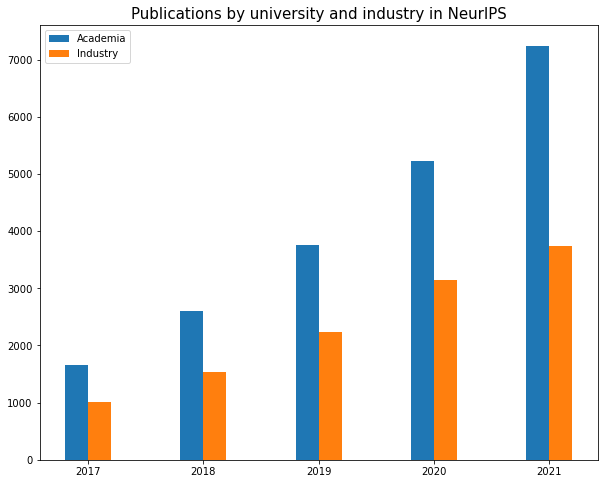

In [38]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(nips_university.keys()))
bar_width = 0.2
axs.bar(years, nips_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, nips_industry.values(), width = bar_width, label = 'Industry')
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Publications by university and industry in NeurIPS', fontsize = 15)

Text(0.5, 1.0, 'Publications by university and industry in ICML')

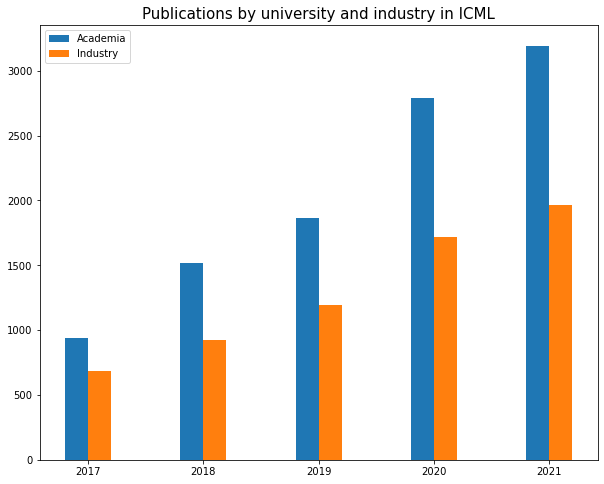

In [39]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(icml_university.keys()))
bar_width = 0.2
axs.bar(years, icml_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, icml_industry.values(), width = bar_width, label = 'Industry')
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Publications by university and industry in ICML', fontsize = 15)

Text(0.5, 1.0, 'Publications by university and industry in ICLR')

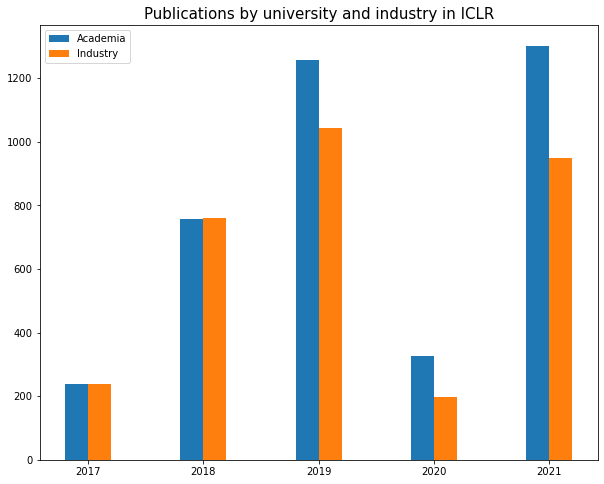

In [40]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(iclr_university.keys()))
bar_width = 0.2
axs.bar(years, iclr_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, iclr_industry.values(), width = bar_width, label = 'Industry')
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
# axs.spines['top'].set_visible(False)
axs.legend(fontsize = 10)
axs.set_title('Publications by university and industry in ICLR', fontsize = 15)

In [41]:
industry_kewords = ['google','microsoft','adobe','amazon','deepmind','ai','research','systems','nvidia','amd']

In [42]:
industry = pd.DataFrame(columns=['keywords'])
industry['keywords'] = industry_kewords

In [43]:
industry

,keywords
0,google
1,microsoft
2,adobe
3,amazon
4,deepmind
5,ai
6,research
7,systems
8,nvidia
9,amd


In [44]:
industry.to_csv(data_dir + 'industry_keywords.csv')

# Collaboration of UCSD with industry 

In [45]:
def get_affiliations(aff): 
    for i in range(len(aff)): 
        aff[i] = str(aff[i]).replace("'",'').replace("'",'').replace('"','').replace('"','').replace('[','').replace(']','').lower()
        

In [46]:
get_affiliations(affil_nips_2017)
get_affiliations(affil_nips_2018)
get_affiliations(affil_nips_2019)
get_affiliations(affil_nips_2020)
get_affiliations(affil_nips_2021)

get_affiliations(affil_icml_2017)
get_affiliations(affil_icml_2018)
get_affiliations(affil_icml_2019)
get_affiliations(affil_icml_2020)
get_affiliations(affil_icml_2021)

get_affiliations(affil_iclr_2017)
get_affiliations(affil_iclr_2018)
get_affiliations(affil_iclr_2019)
get_affiliations(affil_iclr_2020)
get_affiliations(affil_iclr_2021)


In [47]:
nips_collab = {2017:0, 2018:0,2019:0,2020:0,2021:0}
years = list(nips_collab.keys())
names = [affil_nips_2017,affil_nips_2018,affil_nips_2019,affil_nips_2020,affil_nips_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords) and any(key in temp[j] for key in industry_kewords): 
            nips_collab[year]+=1

In [48]:
icml_collab = {2017:0, 2018:0,2019:0,2020:0, 2021:0}
years = list(icml_collab.keys())
names = [affil_icml_2017,affil_icml_2018,affil_icml_2019,affil_icml_2020,affil_icml_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords) and any(key in temp[j] for key in industry_kewords): 
            icml_collab[year]+=1

In [49]:
iclr_collab = {2017:0, 2018:0,2019:0,2020:0,2021:0}
years = list(iclr_collab.keys())
names = [affil_iclr_2017,affil_iclr_2018,affil_iclr_2019,affil_iclr_2020,affil_iclr_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords) and any(key in temp[j] for key in industry_kewords): 
            iclr_collab[year]+=1

In [50]:
nips_collab

{2017: 215, 2018: 294, 2019: 449, 2020: 613, 2021: 764}

In [51]:
icml_collab

{2017: 104, 2018: 162, 2019: 238, 2020: 313, 2021: 363}

In [52]:
iclr_collab

{2017: 50, 2018: 144, 2019: 198, 2020: 44, 2021: 172}

Text(0.5, 1.0, 'Collaborations between university and industry in NeurIPS')

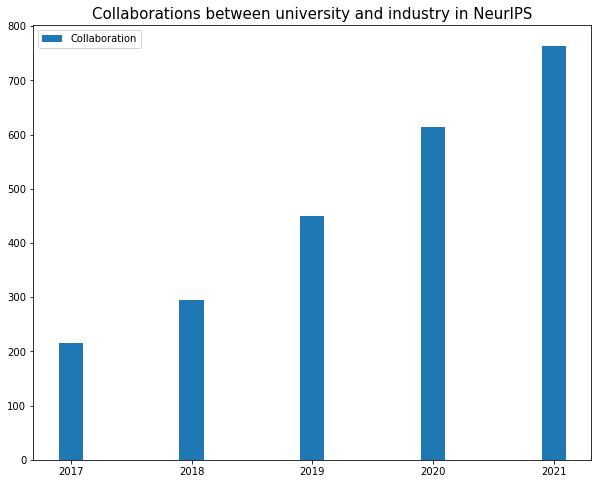

In [53]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(nips_collab.keys()))
bar_width = 0.2
axs.bar(years, nips_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Collaborations between university and industry in NeurIPS', fontsize = 15)

Text(0.5, 1.0, 'Collaborations between university and industry in ICML')

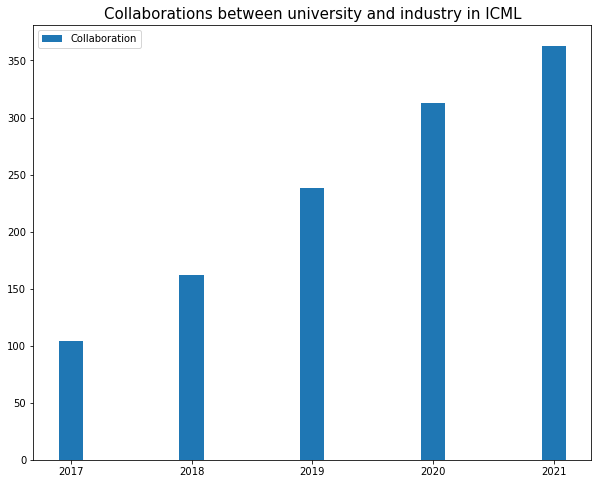

In [54]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(icml_collab.keys()))
bar_width = 0.2
axs.bar(years, icml_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Collaborations between university and industry in ICML', fontsize = 15)

Text(0.5, 1.0, 'Collaborations between university and industry in ICLR')

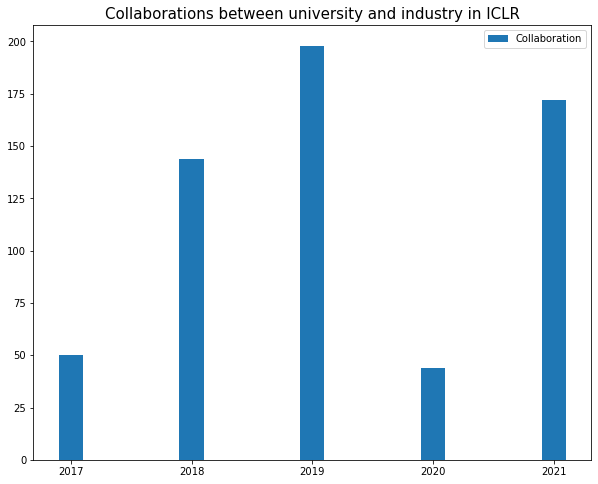

In [55]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(iclr_collab.keys()))
bar_width = 0.2
axs.bar(years, iclr_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Collaborations between university and industry in ICLR', fontsize = 15)

In [56]:
ucsd_nips_collab = {2017:0, 2018:0,2019:0,2020:0}
ucsd_key = ['ucsd', 'uc san diego', 'university of california san diego',\
            'university of california at san diego','university of california, san diego','university of california']
years = list(ucsd_nips_collab.keys())
names = [affil_nips_2017,affil_nips_2018,affil_nips_2019,affil_nips_2020]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords): 
            ucsd_nips_collab[year]+=1

In [57]:
ucsd_nips_collab

{2017: 8, 2018: 6, 2019: 20, 2020: 23}

In [58]:
ucsd_key = ['ucsd', 'uc san diego', 'univerisity of california san diego',\
            'univerisity of california, san diego','univerisity of california']

In [59]:
ucsd_nips = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(ucsd_nips.keys())
names = [affil_nips_2017,affil_nips_2018,affil_nips_2019,affil_nips_2020,affil_nips_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords) : 
            ucsd_nips[year]+=1

ucsd_icml = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(ucsd_icml.keys())
names = [affil_icml_2017,affil_icml_2018,affil_icml_2019,affil_icml_2020,affil_icml_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords) : 
            ucsd_icml[year]+=1
            
ucsd_iclr = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(ucsd_iclr.keys())
names = [affil_iclr_2017,affil_iclr_2018,affil_iclr_2019,affil_iclr_2020,affil_iclr_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords) : 
            ucsd_iclr[year]+=1
                        


In [60]:
ucsd_iclr

{2017: 0, 2018: 0, 2019: 1, 2020: 1, 2021: 2}

In [61]:
ucsd_icml

{2017: 3, 2018: 0, 2019: 2, 2020: 2, 2021: 2}

In [62]:
ucsd_nips

{2017: 1, 2018: 1, 2019: 6, 2020: 7, 2021: 5}

In [63]:
ucsd_collab = {2017:0, 2018:0,2019:0,2020:0,2021:0}
years = list(ucsd_collab.keys())
for year in (years): 
    ucsd_collab[year] = ucsd_nips[year] + ucsd_icml[year] + ucsd_iclr[year]

In [64]:
ucsd_collab

{2017: 4, 2018: 1, 2019: 9, 2020: 10, 2021: 9}

Text(0.5, 1.0, 'Collaborations between UCSD and Industries')

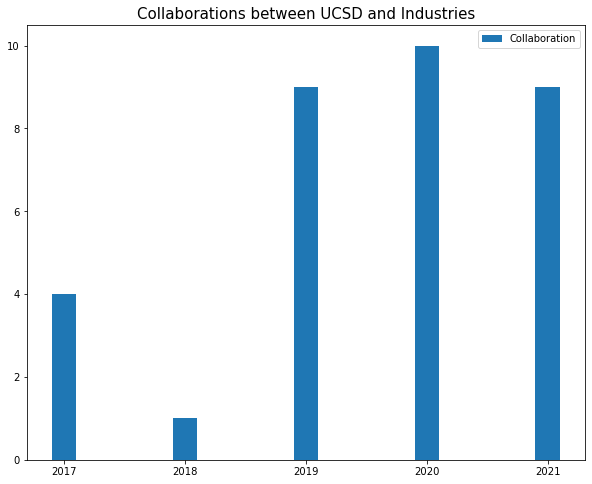

In [65]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(ucsd_collab.keys()))
bar_width = 0.2
axs.bar(years, ucsd_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Collaborations between UCSD and Industries', fontsize = 15)